# Part 1

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [44]:
data = pd.read_csv('data_reg.csv')

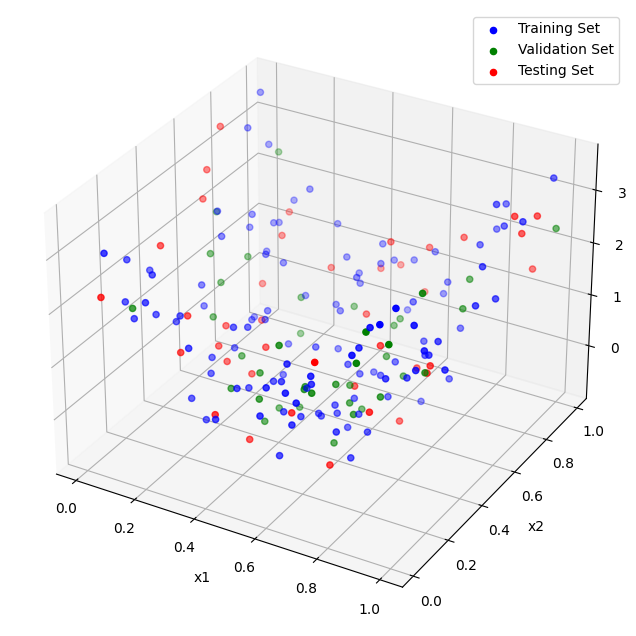

In [45]:
train_set = data[:120]
val_set = data[120:160]
test_set = data[160:]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_set['x1'], train_set['x2'], train_set['y'], c='b', marker='o', label='Training Set')
ax.scatter(val_set['x1'], val_set['x2'], val_set['y'], c='g', marker='o', label='Validation Set')
ax.scatter(test_set['x1'], test_set['x2'], test_set['y'], c='r', marker='o', label='Testing Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.legend()
plt.show()

We can see from the figure above the training set represented by the blue color, the validation set represented by the green color, and the testing set represented by the red color.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

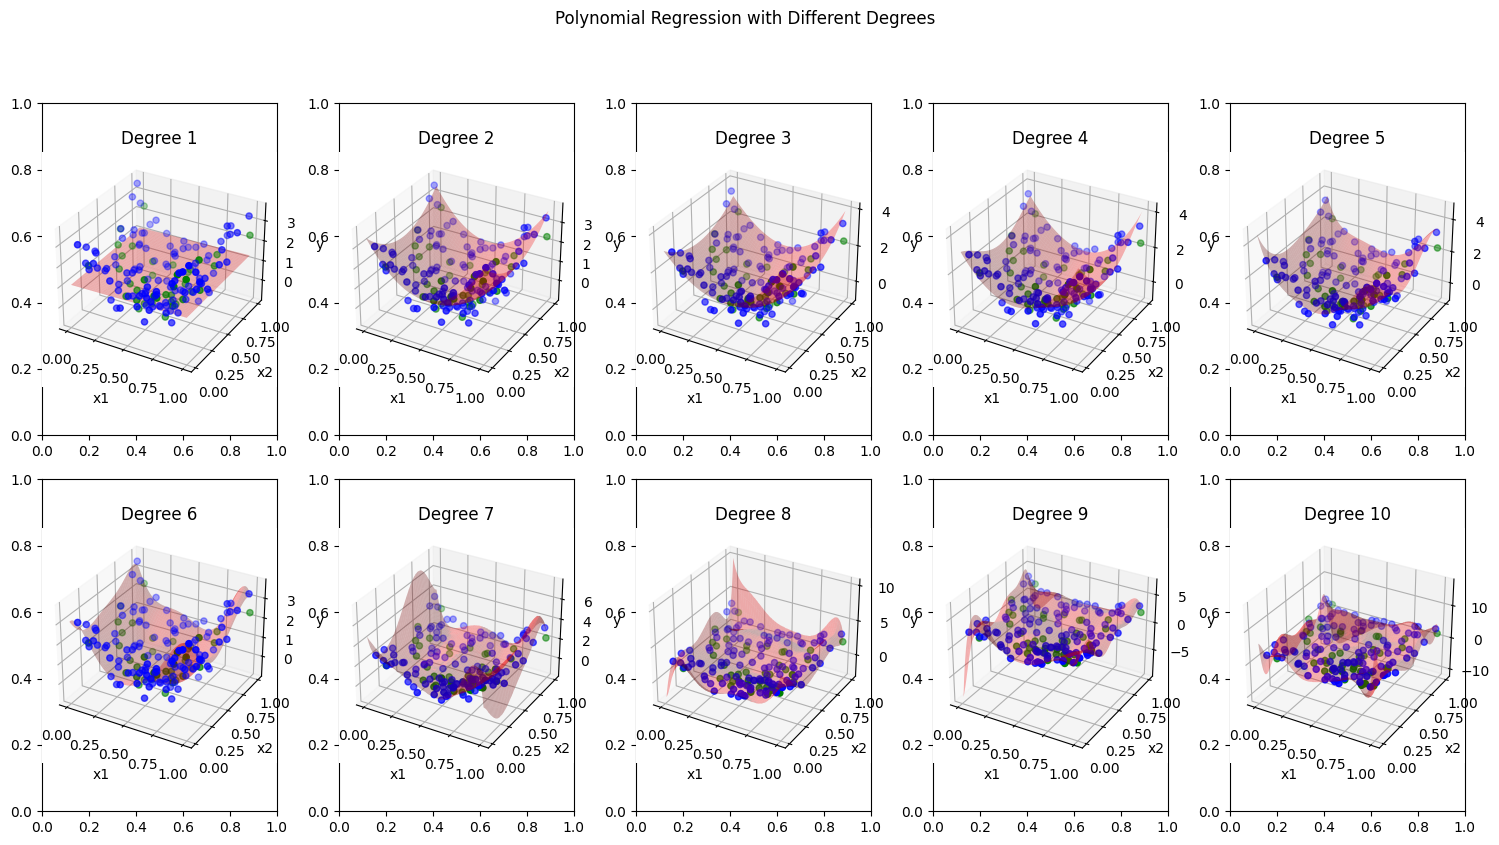

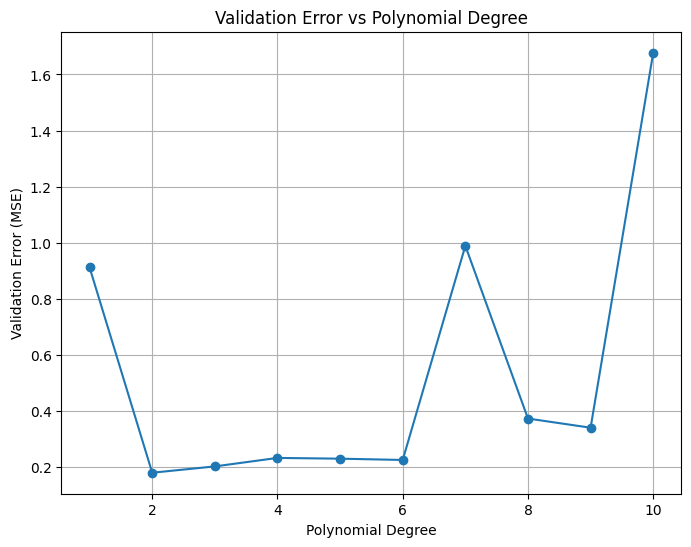

The best polynomial degree is: 2


In [47]:
# Training data
training_x = train_set[['x1', 'x2']]
training_y = train_set['y']

# Validation data
validation_x = val_set[['x1', 'x2']]
validation_y = val_set['y']

degrees = np.arange(1, 11) # The polynomial degrees from 1 to 10
validation_errors = [] # This will store the MSE for each degree

fig, ax = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('Polynomial Regression with Different Degrees', y=1.05)

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    training_x_poly = poly.fit_transform(training_x) # Polynomial feature transformation on the training set
    validation_x_poly = poly.transform(validation_x) # Create Polynomial Features for Validation Set

    model = LinearRegression() # Applying a linear Regression Model

    #  Training the linear regression model using the transformed polynomial features (training_x_poly) and the corresponding target values (training_y)
    model.fit(training_x_poly, training_y)

    # Predicting the target values for the validation set (validation_x_poly) using the trained linear regression model
    validation_y_pred = model.predict(validation_x_poly)

    mse = mean_squared_error(validation_y, validation_y_pred) # Calculating the MSE between the two arrays
    validation_errors.append(mse)

    # Plotting
    ax_i = ax[i // 5, i % 5]
    ax_i = fig.add_subplot(2, 5, i + 1, projection='3d')
    ax_i.scatter(training_x['x1'], training_x['x2'], training_y, c='b', marker='o', label='Training Set')
    ax_i.scatter(validation_x['x1'], validation_x['x2'], validation_y, c='g', marker='o', label='Validation Set')
    x1_range = np.linspace(training_x['x1'].min(), training_x['x1'].max(), 100)
    x2_range = np.linspace(training_x['x2'].min(), training_x['x2'].max(), 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    X_mesh_poly = poly.transform(X_mesh)
    y_mesh_pred = model.predict(X_mesh_poly)
    y_mesh_pred = y_mesh_pred.reshape(x1_mesh.shape)
    ax_i.plot_surface(x1_mesh, x2_mesh, y_mesh_pred, color='r', alpha=0.3, label=f'Degree {degree} Fit')
    ax_i.set_title(f'Degree {degree}')
    ax_i.set_xlabel('x1')
    ax_i.set_ylabel('x2')
    ax_i.set_zlabel('y')

plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(degrees, validation_errors, marker='o')
plt.title('Validation Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error (MSE)')
plt.grid(True)
plt.show()

best_degree = degrees[np.argmin(validation_errors)] # Taking the minimum between all MSEs
print(f"The best polynomial degree is: {best_degree}")

In this code, we iterate through each degree, create polynomial features (X_train_poly, X_val_poly), fit a linear regression model (model) on the training data, predict on the validation set, and calculate the mean squared error (MSE) which is then appended to validation_errors.

The code will fit polynomial regression models with degrees ranging from 1 to 10. For each degree, the code evaluates the performance of the model on the validation set and plots the results.

The purpose of iterating over different degrees is to find the polynomial degree that results in the best performance on the validation set. The "best" degree is often determined by the one that minimizes a chosen evaluation metric, such as mean squared error (MSE) in out case.

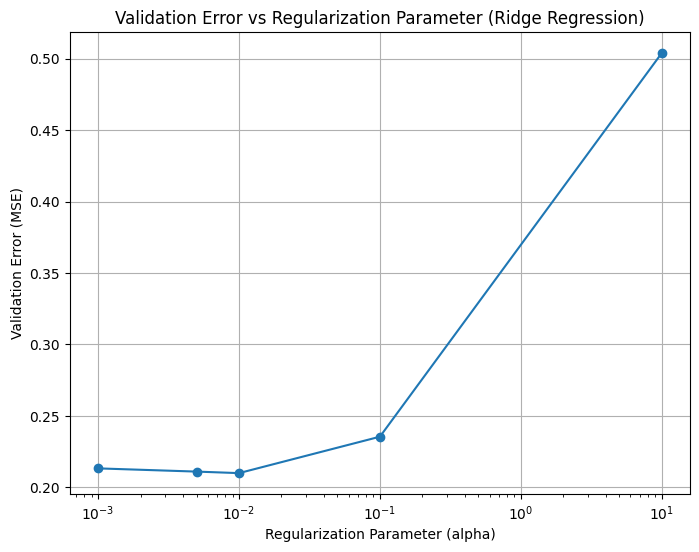

The best regularization parameter (alpha) is: 0.01


In [48]:
# Preparing the data as in the previous part
training_x = train_set[['x1', 'x2']]
training_y = train_set['y']
validation_x = val_set[['x1', 'x2']]
validation_y = val_set['y']

degree = 8 # We will use only this degree
alphas = [0.001, 0.005, 0.01, 0.1, 10] # The regularization parameters
validation_errors = []

'''
  This loop iterates through each alpha, fits a Ridge regression model to the training
  data, predicts on the validation set, and calculates the mean squared error (MSE) for
  each alpha.
'''
for alpha in alphas:
    poly = PolynomialFeatures(degree=degree)
    training_x_poly = poly.fit_transform(training_x)
    validation_x_poly = poly.transform(validation_x)

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(training_x_poly, training_y)

    validation_y_pred = ridge_model.predict(validation_x_poly)

    mse = mean_squared_error(validation_y, validation_y_pred)
    validation_errors.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(alphas, validation_errors, marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Validation Error vs Regularization Parameter (Ridge Regression)')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Validation Error (MSE)')
plt.grid(True)
plt.show()

best_alpha = alphas[np.argmin(validation_errors)]
print(f"The best regularization parameter (alpha) is: {best_alpha}")

The code prints the alpha with the minimum validation error, indicating the best regularization parameter for the Ridge regression model among the given options.

The purpose of this code is to perform hyperparameter tuning for the Ridge regression model by testing different values of the regularization parameter (alpha) and selecting the one that results in the lowest validation error.

# Part 2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


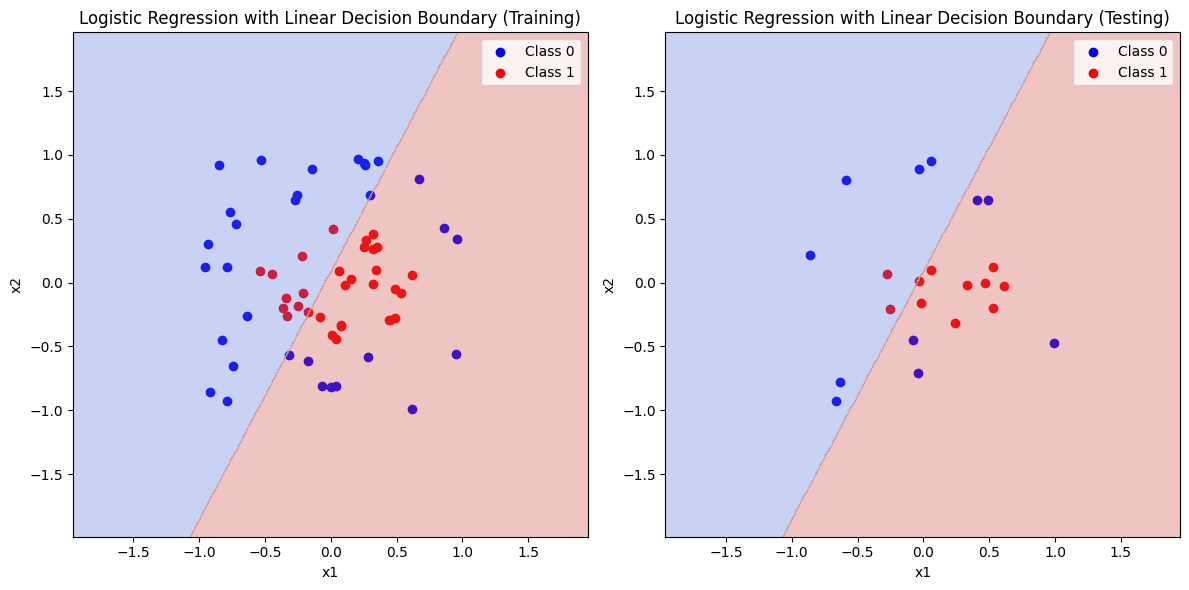

Training Accuracy: 0.6613
Testing Accuracy: 0.6818


In [49]:
# Reading the data
train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')
training_x = train_data[['x1', 'x2']]
training_y = train_data['class']
X_test = test_data[['x1', 'x2']]
y_test = test_data['class']

# The labels are encoded using LabelEncoder to convert categorical class labels ('Class 0' and 'Class 1') into numerical values (0 and 1)
label_encoder = LabelEncoder()
training_y = label_encoder.fit_transform(training_y)
y_test = label_encoder.transform(y_test)

logistic_model = LogisticRegression()
logistic_model.fit(training_x, training_y) # Training the model on the training data

'''
    Predictions are made on both the training and testing sets, and the accuracy
    is calculated using accuracy_score from scikit-learn. The accuracy is the
    ratio of correctly predicted instances to the total number of instances.
'''
training_y_pred = logistic_model.predict(training_x)
train_accuracy = accuracy_score(training_y, training_y_pred)
y_test_pred = logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plotting the results for training set
plt.figure(figsize=(12, 6))

# Plotting training data points
plt.subplot(1, 2, 1)
plt.scatter(training_x[training_y == 0]['x1'], training_x[training_y == 0]['x2'], color='blue', label='Class 0')
plt.scatter(training_x[training_y == 1]['x1'], training_x[training_y == 1]['x2'], color='red', label='Class 1')

x_min, x_max = training_x['x1'].min() - 1, training_x['x1'].max() + 1
y_min, y_max = training_x['x2'].min() - 1, training_x['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression with Linear Decision Boundary (Training)')
plt.legend()

# Plotting the results for testing set
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0]['x1'], X_test[y_test == 0]['x2'], color='blue', label='Class 0')
plt.scatter(X_test[y_test == 1]['x1'], X_test[y_test == 1]['x2'], color='red', label='Class 1')

Z_test = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.contourf(xx, yy, Z_test, cmap=plt.cm.coolwarm, alpha=0.3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression with Linear Decision Boundary (Testing)')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')


* Training Accuracy = 0.6613: This means that the logistic regression model correctly predicted the class labels for approximately 66.13% of the instances in the training set. Training accuracy measures how well the model performs on the data it was trained on.

* Testing Accuracy = 0.6818: The testing accuracy of approximately 68.18% indicates that the model correctly predicted the class labels for around 68.18% of the instances in the testing set. Testing accuracy estimates of how well the model generalizes to new, unseen data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


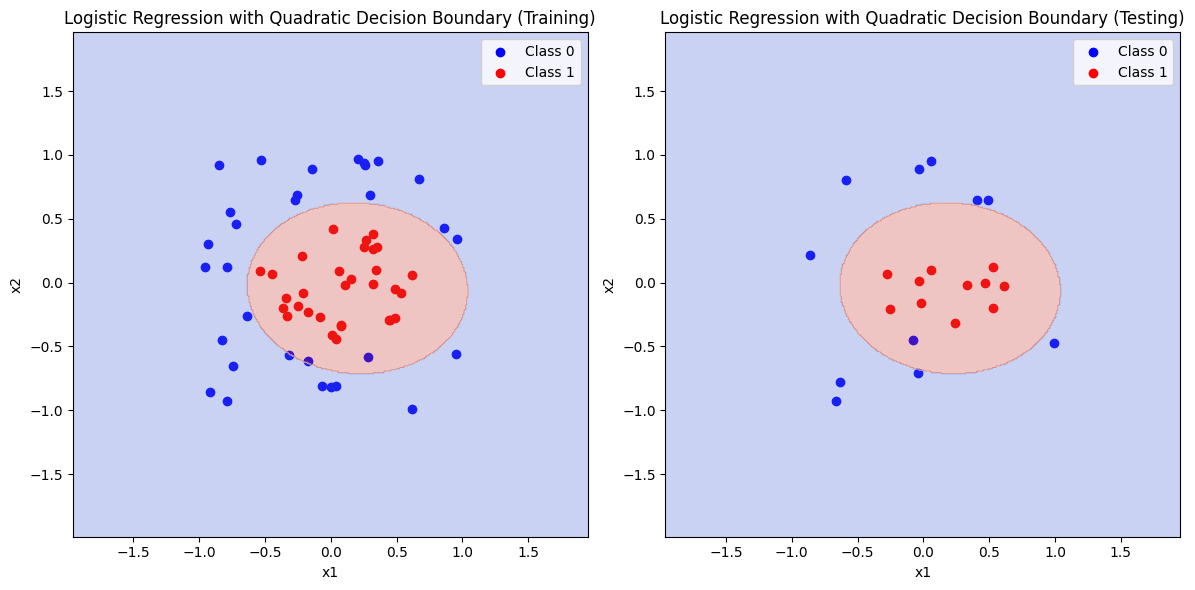

Training Accuracy: 0.9677
Testing Accuracy: 0.9545


In [50]:
# Similar to the previous code, this part encodes the class labels into numerical values
label_encoder = LabelEncoder()
training_y = label_encoder.fit_transform(training_y)
y_test = label_encoder.transform(y_test)

# Generating polynomial features up to degree 2. This creates additional features that include quadratic terms of the original features
poly = PolynomialFeatures(degree=2)
training_x_poly = poly.fit_transform(training_x)
X_test_poly = poly.transform(X_test)

# An instance of the logistic regression model is created, and it is trained on the training data with the polynomial features
logistic_model = LogisticRegression()
logistic_model.fit(training_x_poly, training_y)

# Predictions are made on both the training and testing sets, and the accuracy
# is calculated using accuracy_score from scikit-learn. The accuracy is the
# ratio of correctly predicted instances to the total number of instances.
training_y_pred = logistic_model.predict(training_x_poly)
train_accuracy = accuracy_score(training_y, training_y_pred)
y_test_pred = logistic_model.predict(X_test_poly)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plotting the results for training set
plt.figure(figsize=(12, 6))

# Plotting training data points
plt.subplot(1, 2, 1)
plt.scatter(training_x[training_y == 0]['x1'], training_x[training_y == 0]['x2'], color='blue', label='Class 0')
plt.scatter(training_x[training_y == 1]['x1'], training_x[training_y == 1]['x2'], color='red', label='Class 1')

x_min, x_max = training_x['x1'].min() - 1, training_x['x1'].max() + 1
y_min, y_max = training_x['x2'].min() - 1, training_x['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logistic_model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression with Quadratic Decision Boundary (Training)')
plt.legend()

# Plotting the results for testing set
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0]['x1'], X_test[y_test == 0]['x2'], color='blue', label='Class 0')
plt.scatter(X_test[y_test == 1]['x1'], X_test[y_test == 1]['x2'], color='red', label='Class 1')

Z_test = logistic_model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_test = Z_test.reshape(xx.shape)

plt.contourf(xx, yy, Z_test, cmap=plt.cm.coolwarm, alpha=0.3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression with Quadratic Decision Boundary (Testing)')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')


* Training Accuracy = 0.9677: This high training accuracy of approximately 96.77% suggests that the logistic regression model with a quadratic decision boundary was able to correctly predict the class labels for a large majority of instances in the training set.

* Testing Accuracy = 0.9545: The testing accuracy of approximately 95.45% indicates that the model performed well on the testing set, correctly predicting the class labels for around 95.45% of the instances. This is a positive sign, as it shows that the model generalizes well to new, unseen data.

When there is underfitting, the test accuracy is typically low but comparable to the train accuracy. The train accuracy is typically low. This is due to the model's poor performance on both the training set and new data, which results from its inability to catch the complexity of the data.

When overfitting occurs, the test accuracy is typically significantly lower than the train accuracy. This is due to the model's poor generalization to new, unseen data, despite its ability to match the training set of data quite well through memorization. indicating that the model is not realistic enough.

In the first model we have the following accuracies: The accuracy for the trained data is: 0.6613 and the accuracy for the test data is: 0.6818. Looking at them we can conclude that both accuracies are low and close to each other, which is what the underfitting states, therefore its underfitting.

In the second model we have the following accuracies: The accuracy for the trained data is: 0.9677 and the accuracy for the test data is: 0.9545. We can notice that both values are relatively high accuracies (so no underfitting here), both are also close to each other, so as we can see no overfitting occurs here.